<a href="https://colab.research.google.com/github/chiusanghung/Stock-Prediction/blob/main/FPT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model

from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Load_data
df_link = '/content/drive/MyDrive/Dataset/FPT.csv'

df = pd.read_csv(df_link, index_col='Date/Time', parse_dates=True)

In [4]:
df1=pd.DataFrame(df,columns=('Date/Time','Close'))
#df1.index=df1.Date
df1.drop("Date/Time",axis=1,inplace=True)

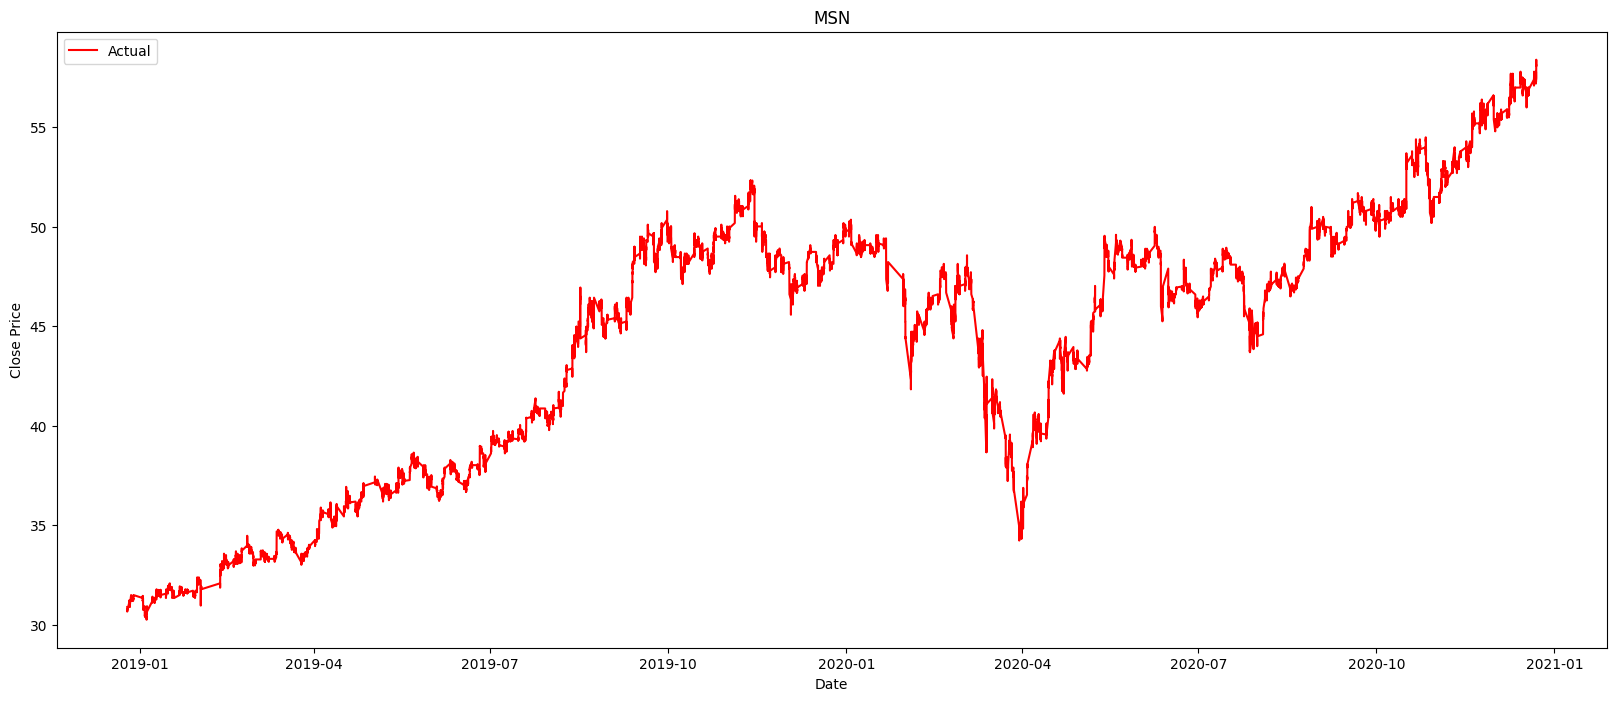

In [5]:
plt.figure(figsize=(20,8))
plt.plot(df1['Close'], label='Actual', color='red')
plt.title('MSN')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [9]:
df1

,Close
Date/Time,
2018-12-25 09:15:00,30.89
2018-12-25 09:16:00,30.81
2018-12-25 09:17:00,30.74
2018-12-25 09:18:00,30.74
2018-12-25 09:19:00,30.74
...,...
2020-12-22 14:24:00,58.20
2020-12-22 14:25:00,58.20
2020-12-22 14:26:00,58.20


In [35]:
data = df1.values
train_data = data[:80000]
test_data = data[80000:]

sc = MinMaxScaler(feature_range = (0,1))
sc_train = sc.fit_transform(data)

In [36]:
x_train, y_train = [],[]
for i in range(50, len(train_data)):
  x_train.append(sc_train[i-50:i, 0])
  y_train.append(sc_train[i, 0])

x_train = np.array(x_train)
y_train = np.array(y_train)

x_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[1], 1))
y_train = np.reshape(y_train, (y_train.shape[0], 1))

In [37]:
model = Sequential()
model.add(LSTM(units = 128, input_shape=(x_train.shape[1], 1), return_sequences = True))
model.add(LSTM(units = 64))
model.add(Dropout(0.5))
model.add(Dense(1))
model.compile(loss='mean_absolute_error', optimizer='adam')

In [38]:
save_model='MSN.h5'
best_model = ModelCheckpoint(save_model, monitor='loss',verbose=2,save_best_only=True,modee='auto')
model.fit(x_train,y_train,epochs=100, batch_size=50, verbose=2, callbacks=[best_model])

Epoch 1/100

Epoch 1: loss improved from inf to 0.03506, saving model to MSN.h5
1599/1599 - 20s - loss: 0.0351 - 20s/epoch - 13ms/step
Epoch 2/100


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: loss improved from 0.03506 to 0.02048, saving model to MSN.h5
1599/1599 - 11s - loss: 0.0205 - 11s/epoch - 7ms/step
Epoch 3/100

Epoch 3: loss improved from 0.02048 to 0.01873, saving model to MSN.h5
1599/1599 - 11s - loss: 0.0187 - 11s/epoch - 7ms/step
Epoch 4/100

Epoch 4: loss improved from 0.01873 to 0.01826, saving model to MSN.h5
1599/1599 - 10s - loss: 0.0183 - 10s/epoch - 6ms/step
Epoch 5/100

Epoch 5: loss improved from 0.01826 to 0.01819, saving model to MSN.h5
1599/1599 - 11s - loss: 0.0182 - 11s/epoch - 7ms/step
Epoch 6/100

Epoch 6: loss improved from 0.01819 to 0.01808, saving model to MSN.h5
1599/1599 - 11s - loss: 0.0181 - 11s/epoch - 7ms/step
Epoch 7/100

Epoch 7: loss did not improve from 0.01808
1599/1599 - 11s - loss: 0.0181 - 11s/epoch - 7ms/step
Epoch 8/100

Epoch 8: loss improved from 0.01808 to 0.01805, saving model to MSN.h5
1599/1599 - 10s - loss: 0.0180 - 10s/epoch - 6ms/step
Epoch 9/100

Epoch 9: loss improved from 0.01805 to 0.01787, saving model 

In [39]:
model.save('/content/drive/MyDrive/Dataset/FPT.h5')

In [43]:
y_train = sc.inverse_transform(y_train)
final_model = load_model('/content/drive/MyDrive/Dataset/FPT.h5')
y_train_predict = final_model.predict(x_train)
y_train_predict = sc.inverse_transform(y_train_predict)

2499/2499 [==============================] - 11s 4ms/step


In [46]:
#Test
test = df1[len(train_data)-50:].values
test = test.reshape(-1,1)
sc_test = sc.transform(test)

x_test=[]
for i in range(50, test.shape[0]):
  x_test.append(sc_test[i-50:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

#data test
y_test = data[80000:]
y_test_predict = final_model.predict(x_test)
y_test_predict = sc.inverse_transform(y_test_predict)

544/544 [==============================] - 3s 6ms/step


<ipython-input-48-a1c077ce389e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data1['Predict'] = y_train_predict #add data
<ipython-input-48-a1c077ce389e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data1['Predict'] = y_test_predict


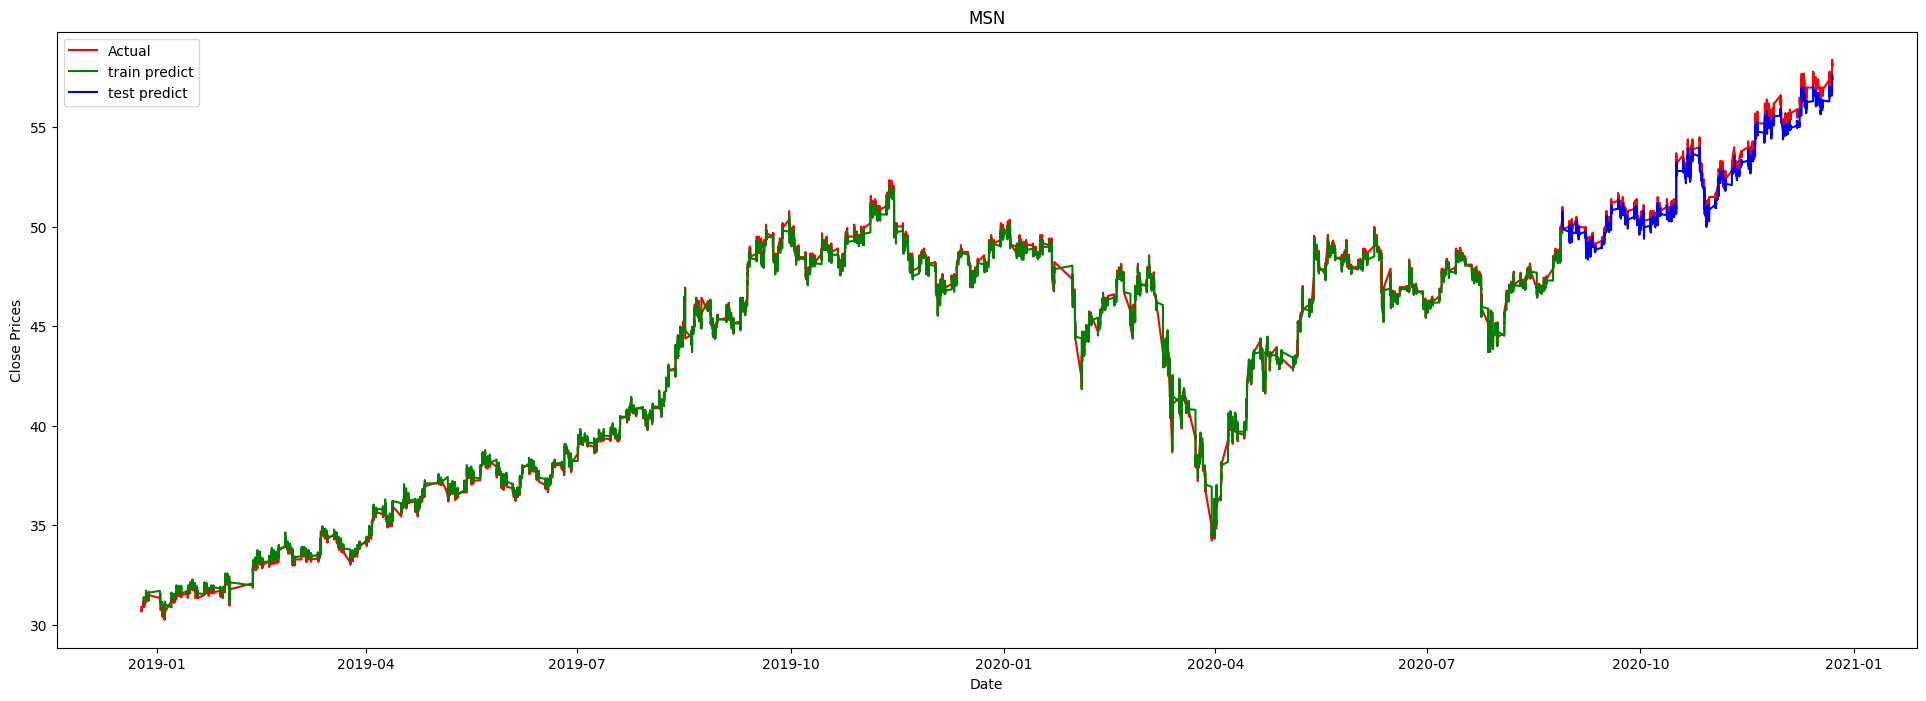

In [48]:
train_data1 = df1[50:80000]
test_data1 = df1[80000:]

plt.figure(figsize=(24,8))
plt.plot(df1,label='Actual',color='red') #line actual
train_data1['Predict'] = y_train_predict #add data
plt.plot(train_data1['Predict'], label='train predict',color='green') #line train predict
test_data1['Predict'] = y_test_predict
plt.plot(test_data1['Predict'], label='test predict',color='blue') #line test predict
plt.title('MSN')
plt.xlabel('Date')
plt.ylabel('Close Prices')
plt.legend()
plt.show()

In [49]:
print('Accuracy Score', r2_score(y_test, y_test_predict))
print('Average absolute error', mean_absolute_error(y_test, y_test_predict))
print('Mean absolute error percentage', mean_absolute_percentage_error(y_test, y_test_predict))

Accuracy Score 0.9747991503207137
Average absolute error 0.37135619845429224
Mean absolute error percentage 0.00690428383101841


In [51]:
train_data1

,Close,Predict
Date/Time,,
2018-12-26 10:19:00,31.15,31.359783
2018-12-26 10:20:00,31.11,31.358303
2018-12-26 10:21:00,31.15,31.318638
2018-12-26 10:22:00,31.11,31.359411
2018-12-26 10:23:00,31.15,31.316700
...,...,...
2020-08-28 09:25:00,50.90,50.601875
2020-08-28 09:26:00,50.90,50.643772
2020-08-28 09:27:00,50.90,50.655605


In [52]:
test_data1

,Close,Predict
Date/Time,,
2020-08-28 09:30:00,50.9,50.674114
2020-08-28 09:31:00,51.0,50.658409
2020-08-28 09:32:00,51.0,50.720440
2020-08-28 09:33:00,50.9,50.739342
2020-08-28 09:34:00,50.9,50.676781
...,...,...
2020-12-22 14:24:00,58.2,57.419556
2020-12-22 14:25:00,58.2,57.444958
2020-12-22 14:26:00,58.2,57.458630
